<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectif" data-toc-modified-id="Objectif-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectif</a></span></li><li><span><a href="#Import" data-toc-modified-id="Import-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Import-Image" data-toc-modified-id="Import-Image-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import Image</a></span><ul class="toc-item"><li><span><a href="#Convertir-l'image-en-gris" data-toc-modified-id="Convertir-l'image-en-gris-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Convertir l'image en gris</a></span></li></ul></li><li><span><a href="#Convolution" data-toc-modified-id="Convolution-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Convolution</a></span></li><li><span><a href="#Import" data-toc-modified-id="Import-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Resize" data-toc-modified-id="Resize-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Resize</a></span></li><li><span><a href="#Création-de-directory" data-toc-modified-id="Création-de-directory-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Création de directory</a></span></li><li><span><a href="#Creation-de-Modèle" data-toc-modified-id="Creation-de-Modèle-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Creation de Modèle</a></span><ul class="toc-item"><li><span><a href="#Comprendre-Max-Pooling" data-toc-modified-id="Comprendre-Max-Pooling-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Comprendre Max Pooling</a></span></li></ul></li><li><span><a href="#Créer-le-data-generator" data-toc-modified-id="Créer-le-data-generator-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Créer le data generator</a></span></li><li><span><a href="#Créer-un-modèle" data-toc-modified-id="Créer-un-modèle-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Créer un modèle</a></span></li><li><span><a href="#Evaluate-the-model" data-toc-modified-id="Evaluate-the-model-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Evaluate the model</a></span><ul class="toc-item"><li><span><a href="#2VGG-Model" data-toc-modified-id="2VGG-Model-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>2VGG Model</a></span></li><li><span><a href="#Prédire-avec-une-nouvelle-data" data-toc-modified-id="Prédire-avec-une-nouvelle-data-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Prédire avec une nouvelle data</a></span></li><li><span><a href="#Reshape" data-toc-modified-id="Reshape-11.3"><span class="toc-item-num">11.3&nbsp;&nbsp;</span>Reshape</a></span></li><li><span><a href="#Hot-encoder" data-toc-modified-id="Hot-encoder-11.4"><span class="toc-item-num">11.4&nbsp;&nbsp;</span>Hot encoder</a></span></li><li><span><a href="#Convertir-int-en-float-et-normalizer" data-toc-modified-id="Convertir-int-en-float-et-normalizer-11.5"><span class="toc-item-num">11.5&nbsp;&nbsp;</span>Convertir int en float et normalizer</a></span></li><li><span><a href="#Préparer-modèle" data-toc-modified-id="Préparer-modèle-11.6"><span class="toc-item-num">11.6&nbsp;&nbsp;</span>Préparer modèle</a></span></li><li><span><a href="#Preparer-le-Kfold" data-toc-modified-id="Preparer-le-Kfold-11.7"><span class="toc-item-num">11.7&nbsp;&nbsp;</span>Preparer le Kfold</a></span></li></ul></li></ul></div>

## Objectif

- Familiariser avec un nouveau data set d'image
- Créer un model CNN
- Prédire et faire un classification
==> correction publié à la fin du cours

## Import


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns; sns.set_theme()
import numpy as np
from scipy import stats
from collections import deque 
import pandas as pd
import matplotlib.pyplot as plt
import glob
from keras.preprocessing.image import ImageDataGenerator
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.transform import rescale
from tensorflow.keras.optimizers import SGD
from scipy.signal import convolve2d
from PIL import Image
import seaborn as sns; sns.set_theme()
import numpy as np
from scipy import stats
import random
from collections import deque 
import os
import tensorflow as tf
import os
from tensorflow.keras.layers import Flatten
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
%matplotlib inline
from joblib import Parallel, delayed
from scipy.stats import f_oneway
# univariate mlp example
from numpy import array
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from matplotlib.patches import Patch
from keras.datasets import mnist
plt.rcParams["figure.figsize"] = (20,10)
import warnings
plt.rcParams["figure.autolayout"] = True
warnings.filterwarnings("ignore")
import warnings
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import pandas as pd
%matplotlib inline
from joblib import Parallel, delayed
from scipy.stats import f_oneway
from matplotlib.patches import Patch
plt.rcParams["figure.figsize"] = (20,10)
import warnings
plt.rcParams["figure.autolayout"] = True
warnings.filterwarnings("ignore")

## Import Image
- (1) Télécharger une image de votre choix au format JPG
- (2) Faire un plot de cette image en utilisant matplotlib.image
- (3) Analyser le nombre de dimension de cette image **.shape**    
- (4) Jouer avec les dimensions et faire des plots pour comprendre à quoi corresponde les dimensions
- (5) Faire un plot en utilisant toutes les valeurs de l'image sauf la dernière dimension
    - Prenez d'abords la première, puis seconde et enfin troisième valeur


(558, 930, 3)


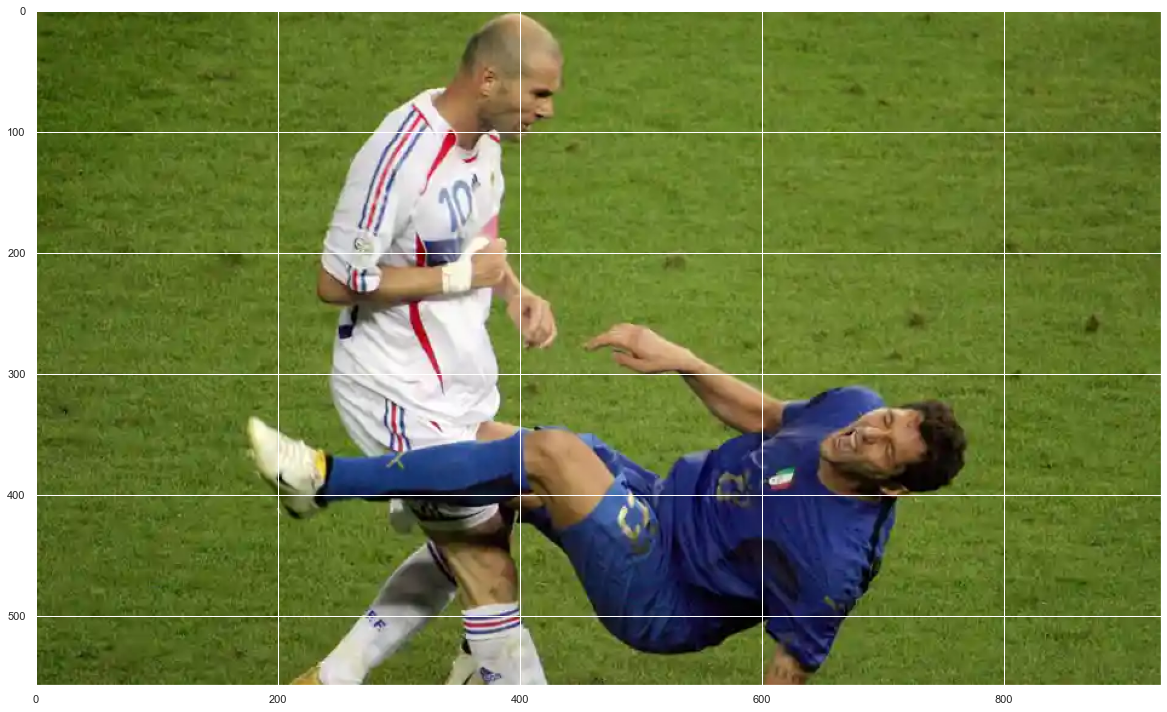

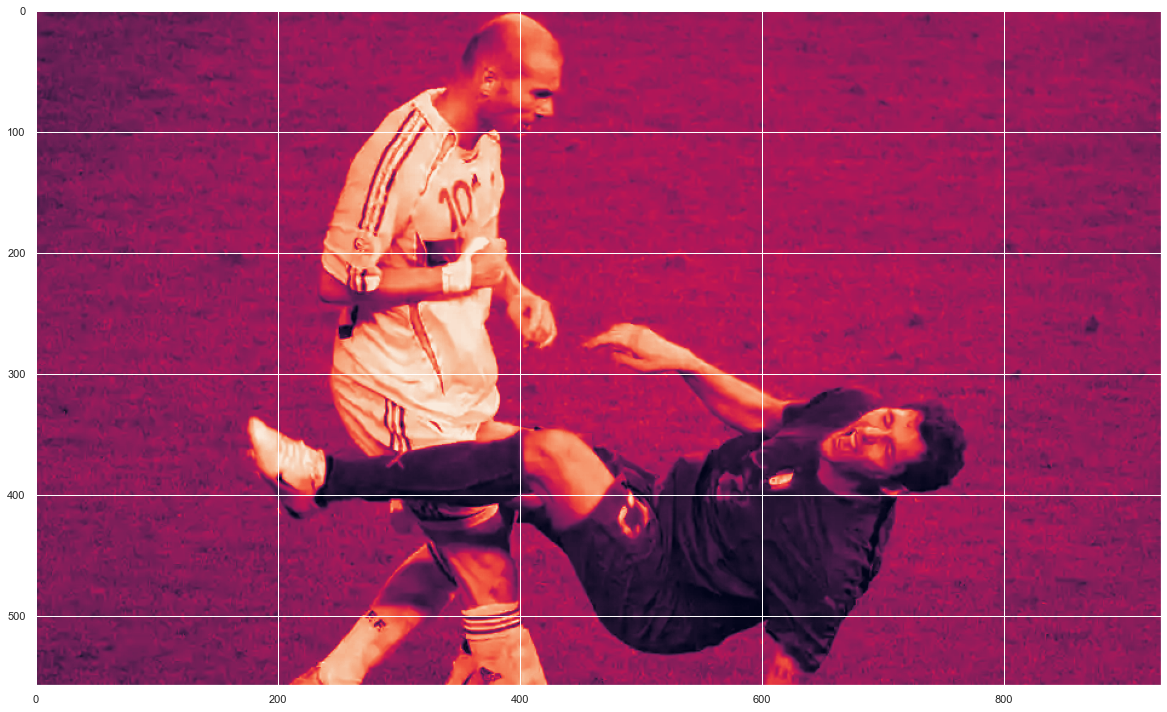

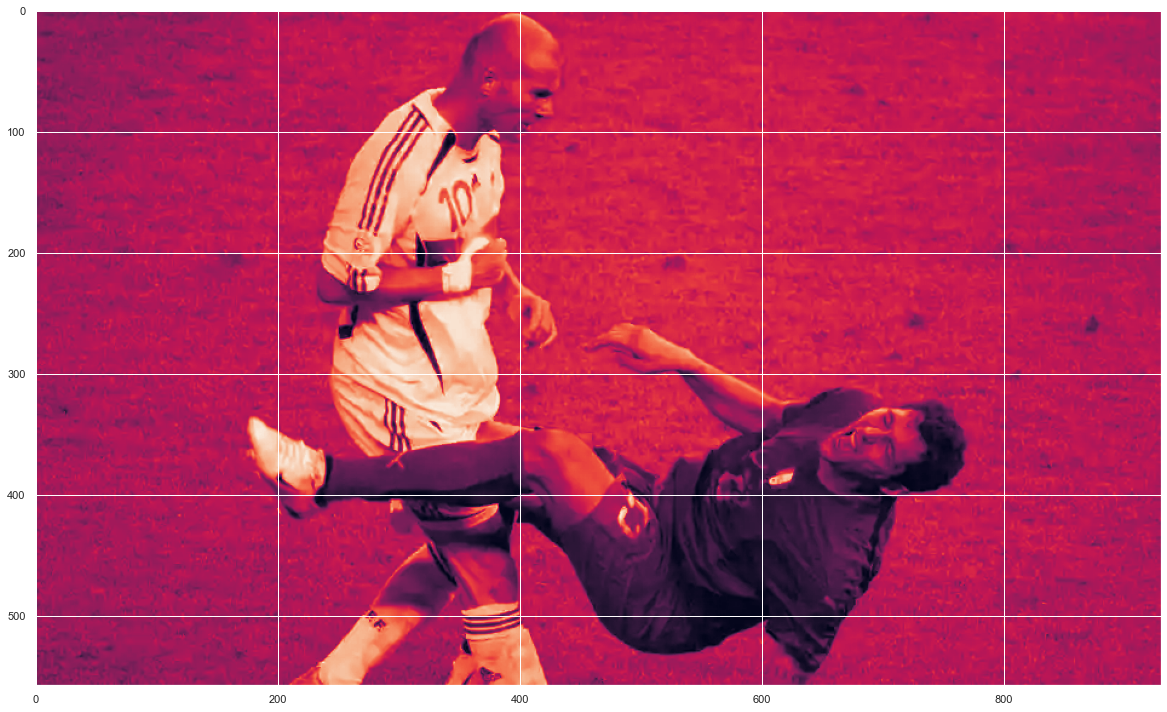

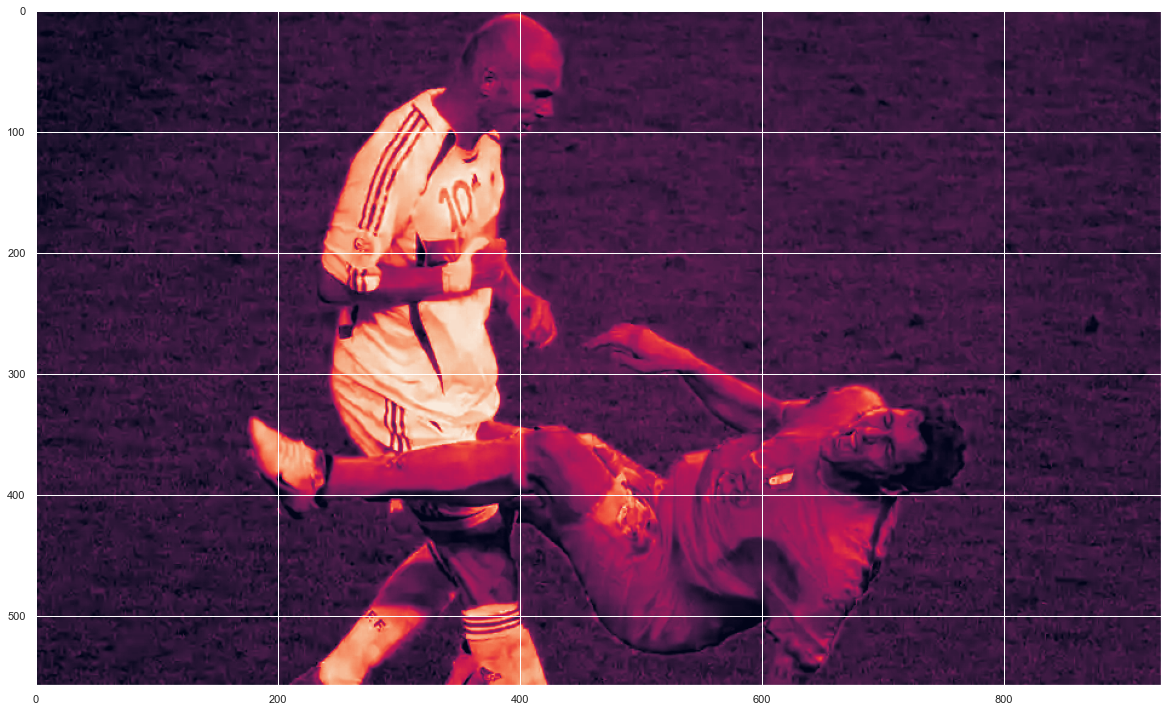

### Convertir l'image en gris
- (1) Multiplier l'index 0 de la 3 dimension par 0.2989, l'index 1 par 0.5870 et l'index 2 par 0.1140
- (2) Faire un plot de la nouvelle matrice

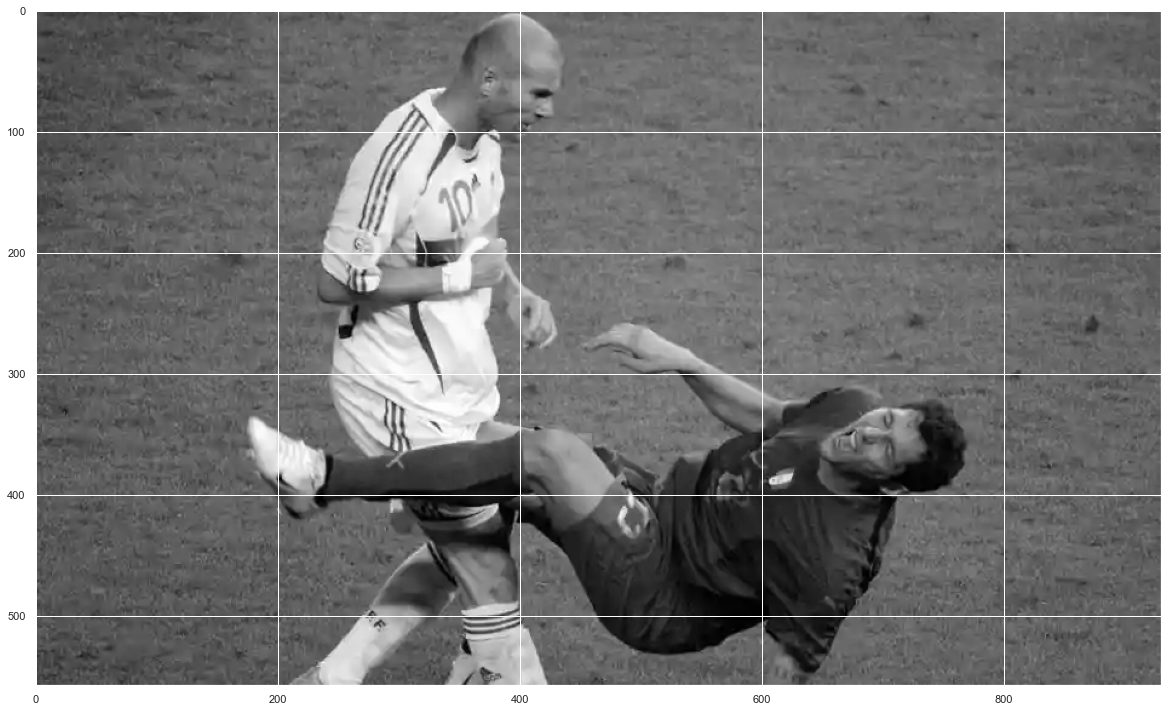

## Convolution
La convolution est simplement la mulitiplication de deux matrices et l'obtention d'une troisème. 
- La première matrice représente l'image
- La seconde représente un filtre, souvent de plus petite taille
- Enfin la troisème et le résultat de cette multiplication

Comme le filtre est généralement plus petit, la mulitiplication du filtre se répète sur la totalité de l'image de base.



In [9]:
def rgb_convolve2d(image, kernel):
    red = convolve2d(image[:,:,0], kernel, 'valid')
    green = convolve2d(image[:,:,1], kernel, 'valid')
    blue = convolve2d(image[:,:,2], kernel, 'valid')
    return np.stack([red, green, blue], axis=2)

In [10]:
r_scaled = rescale(img[:,:,0], 0.10)
g_scaled = rescale(img[:,:,1], 0.10)
b_scaled = rescale(img[:,:,2], 0.10)
img_scaled = np.stack([r_scaled, g_scaled, b_scaled], axis=2)
img_gray_scaled = rescale(rgb2gray(img), 0.10)

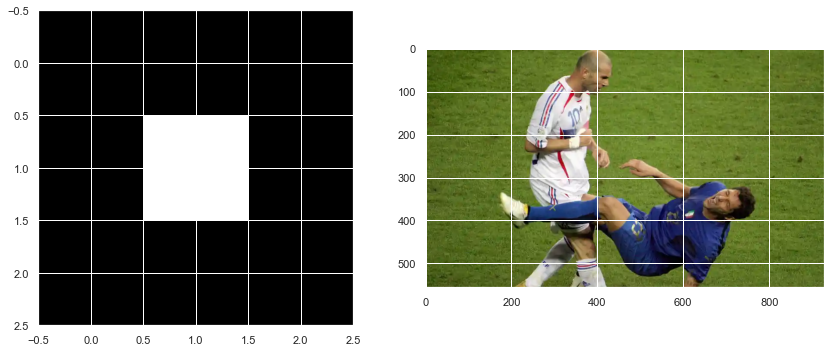

In [11]:
identity = np.array([[0, 0, 0],
                     [0, 1, 0],
                     [0, 0, 0]])
conv_im1 = rgb_convolve2d(img, identity)
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].imshow(identity, cmap='gray')
ax[1].imshow(abs(conv_im1), cmap='gray');

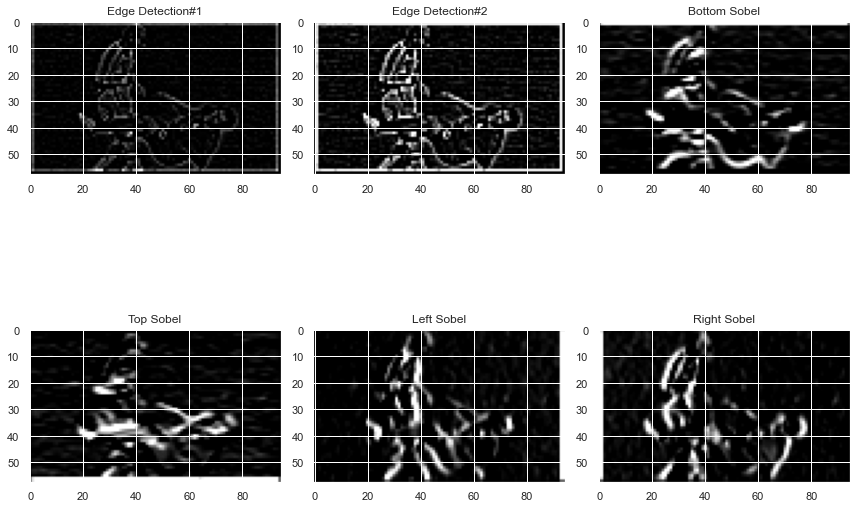

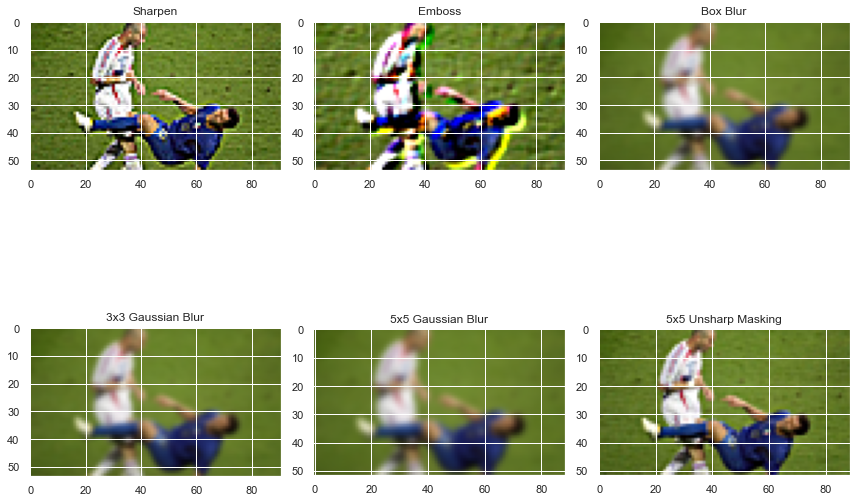

## Import
- (1) Faire un plot d'images de chat et de chiens

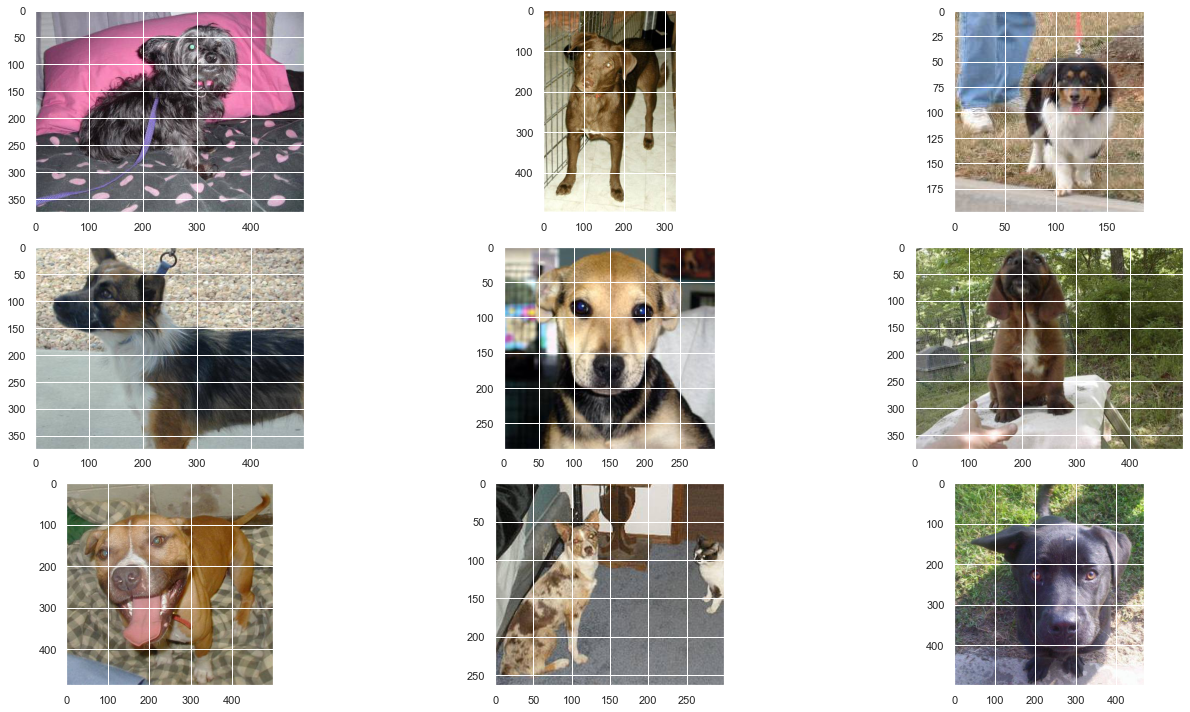

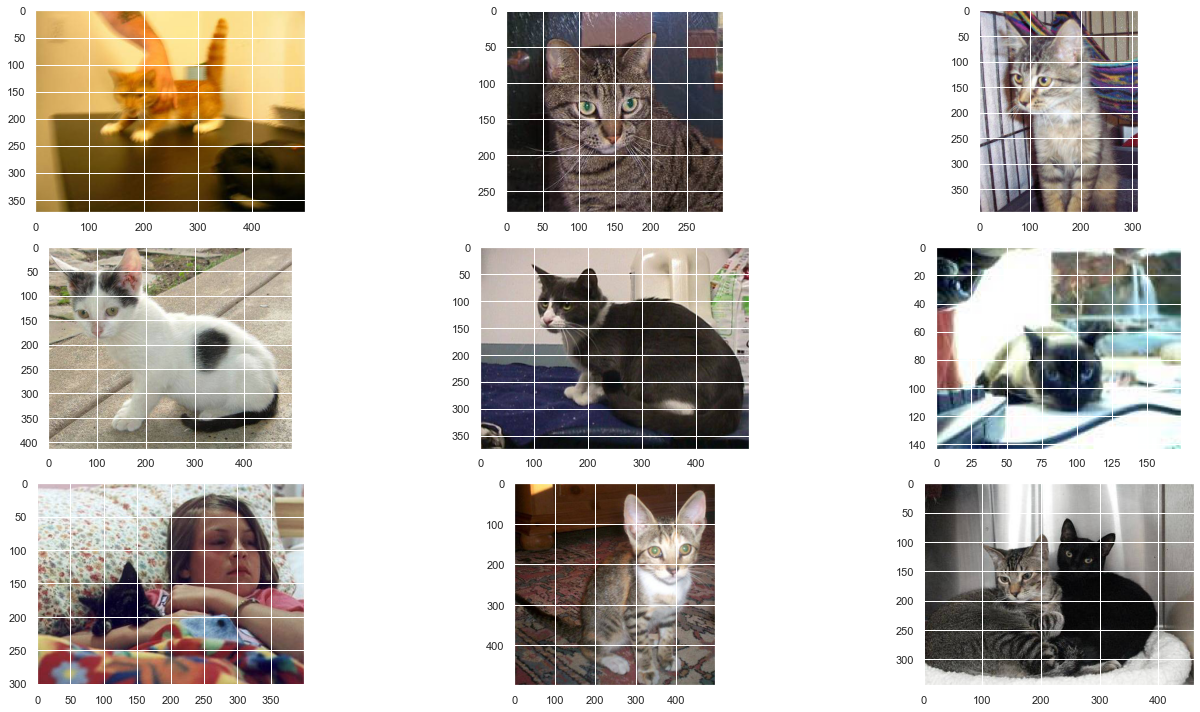

## Resize 
Comme les images ne sont pas forcément à la même échelle, il est indispensable de les uniformiser. Pour se faire nous allons toutes les rendres carrés de 200x200. Comme le data set est relativement gros (500MB), il est possible que certaines machines n'aient pas la capacité computationelle pour loader toutes les images à la fois. On va donc utiliser une fonction de Keras qui permet de loader les images une à une et de les mettre aux bonnes dimensions "on the flow". Au lieu de tout télécharger d'un coup puis de tout resizez.
De même on va utiliser le nom de la photo pour construire nos outputs. Si le nom contient le mot "dog" on ajoutera **1** dans nos outputs, si le nom contient "cat" on ajoutera **0**.
- (1) Utiliser la fonction **load_img** pour resizer les images à la dimension 200x200
- (2) Utiliser la fonction **img_to_array** pour convertir l'image en np array
- (3) Si le nom contient "dog" ajouter **1** à la liste d'output, sinon **0**

(25000, 200, 200, 3) (25000,)


## Création de directory
Pour faire de la classification d'image il est plus facile d'avoir une architecture ordonnée de nos data. on va donc créer 2 sub-directories (train and test) qui contiennent eux mêmes 2 sub-directories (cat and dog)

In [16]:
# create directories
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['dogs/', 'cats/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        os.makedirs(newdir, exist_ok=True)
        


In [17]:
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
# create directories
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['dogs/', 'cats/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = '/Users/mc/Documents/Cours/train_dog_cat'
for file in listdir(src_directory):
    src = src_directory + '/' + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    if file.startswith('cat'):
        dst = dataset_home + dst_dir + 'cats/'  + file
        copyfile(src, dst)
    elif file.startswith('dog'):
        dst = dataset_home + dst_dir + 'dogs/'  + file
        copyfile(src, dst)

## Creation de Modèle
### Comprendre Max Pooling
- https://keras.io/api/layers/convolution_layers/convolution2d/
- https://keras.io/api/layers/pooling_layers/max_pooling2d/
- https://keras.io/api/layers/pooling_layers/average_pooling2d/
- https://keras.io/api/layers/pooling_layers/global_max_pooling2d/
- L'input a besoin d'être en 4 dimensions:
 **tensor_shape = (BATCH_SIZE, WIDTH, HEIGHT, CHANNELS)**
 
 - (1) Ajouter les dimension à la dernière image (image) s'il en manque.
 - (2) Appliquer une convolution 2D à l'aide de Keras 
 - (3) Faire un subplot de l'image de base et de l'image obtenu (predict). Mettre en titre de chaque subplot les dimensions de l'image.
- (4) Ajouter une couche MaxPooling2D 
- (5) Refaire les plots
- (6) Rajouter encore une ou deux couche de MaxPooling2D et refaire les plots
- (7) Répéter la même opération avec AveragePooling (ajouter plusieurs fois et faire des plots)
- (8) Utiliser maintenant GlobalMaxPooling au lieu de MaxPooling et afficher ce que le modèle prédit (pas de plot nécessaire)

In [18]:
from numpy import asarray
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import AveragePooling2D
# define input data


# create model
model = Sequential()
model.add(Conv2D(1, (3,3), activation='relu', 
                 input_shape=(image[:,:,0].shape[0], image[:,:,0].shape[1], 1)))
model.add(AveragePooling2D())
#model.add(MaxPooling2D())
#model.add(GlobalMaxPooling2D())




Metal device set to: Apple M1


2022-04-28 13:22:58.696135: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-28 13:22:58.697245: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 343, 459, 1)       10        
                                                                 
 average_pooling2d (AverageP  (None, 171, 229, 1)      0         
 ooling2D)                                                       
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


2022-04-28 13:22:59.065579: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-28 13:22:59.212594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Text(0.5, 1.0, 'Shape: 171x229')

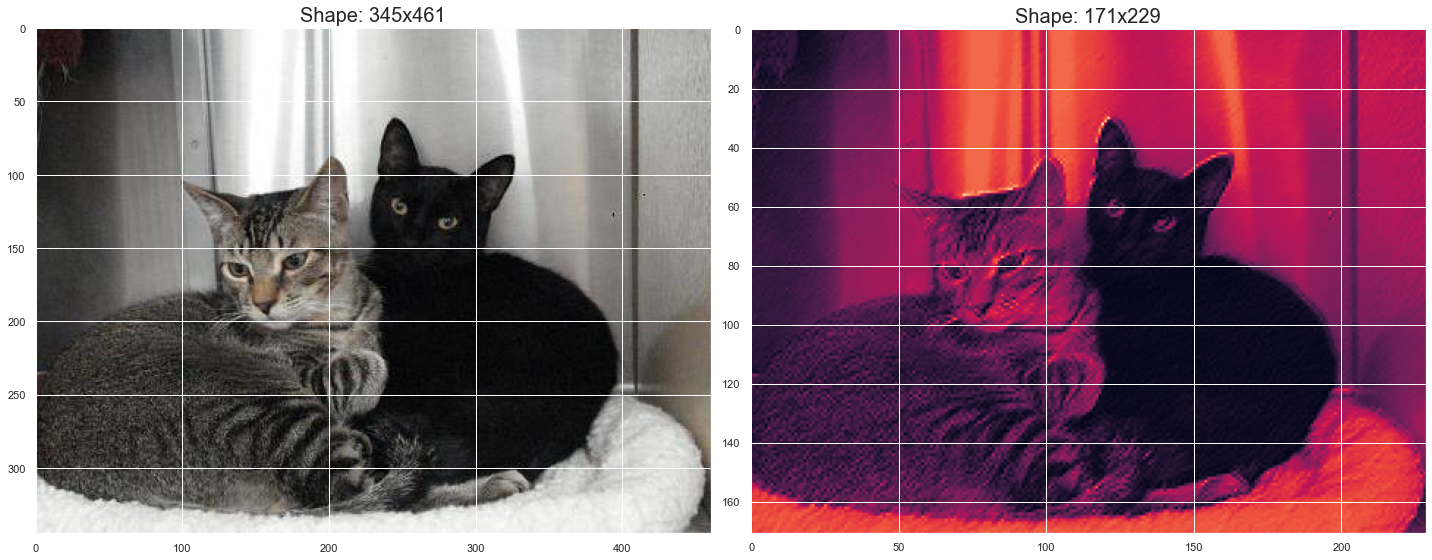

## Créer le data generator
Le datagenerator permet de créer à partir d'un directory ou d'une dataframe nos input. Il est indispensable de resize chaque image par le maximum pour avoir une image normalisée. C'est la même étape que le rescaling pour une série temporelle

In [24]:
# create data generator
datagen = ImageDataGenerator(rescale=1.0/255.0)

train_it = datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
    class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
    class_mode='binary', batch_size=64, target_size=(200, 200))

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.


## Créer un modèle

In [29]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


Epoch 1/2


2022-04-28 13:24:46.105331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


293/293 [==============================] - ETA: 0s - loss: 0.6945 - accuracy: 0.5510

2022-04-28 13:26:05.923148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


293/293 [==============================] - 95s 320ms/step - loss: 0.6945 - accuracy: 0.5510 - val_loss: 0.6762 - val_accuracy: 0.5693
Epoch 2/2
293/293 [==============================] - 94s 320ms/step - loss: 0.6740 - accuracy: 0.5720 - val_loss: 0.6766 - val_accuracy: 0.5702


## Evaluate the model

> 57.020


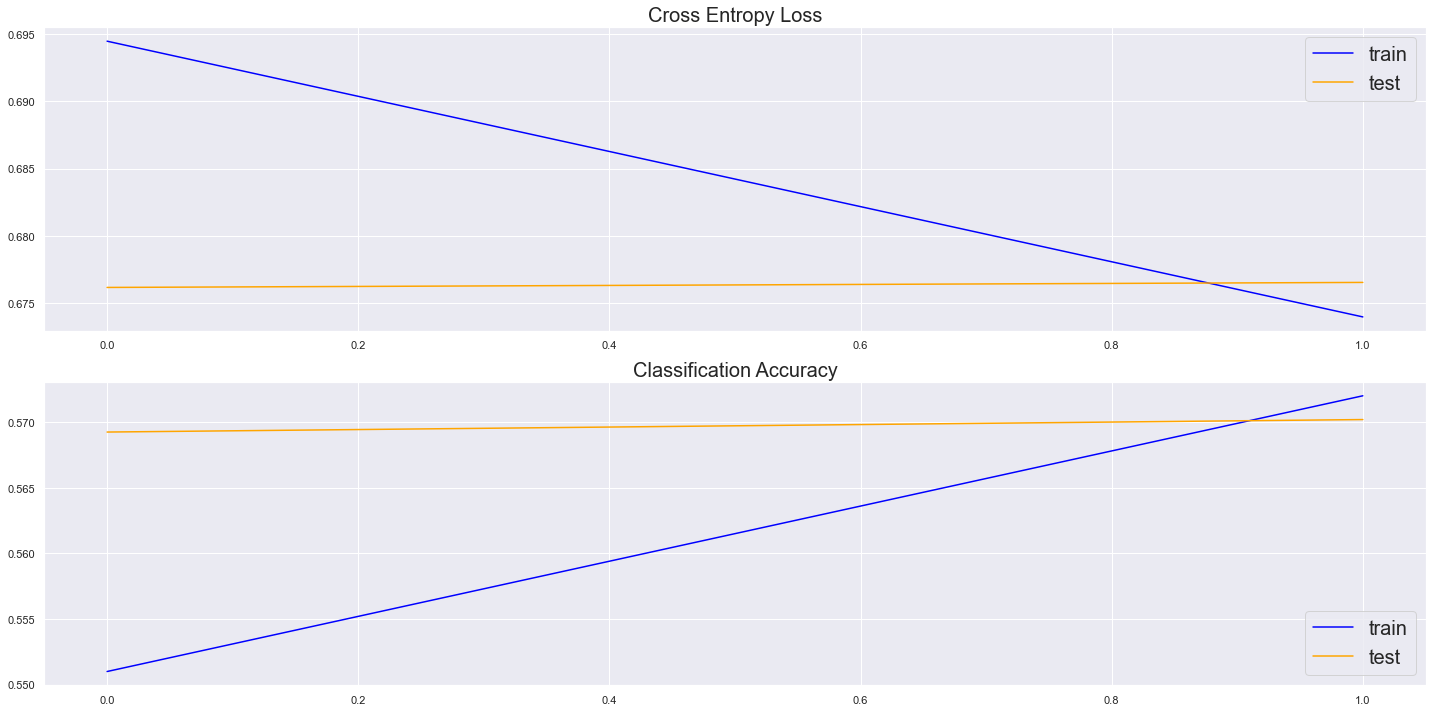

### 2VGG Model 

Epoch 1/20


2022-04-26 21:44:54.106673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


293/293 [==============================] - ETA: 0s - loss: 0.6910 - accuracy: 0.5537

2022-04-26 21:46:15.965388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


293/293 [==============================] - 93s 316ms/step - loss: 0.6910 - accuracy: 0.5537 - val_loss: 0.6801 - val_accuracy: 0.5534
Epoch 2/20
293/293 [==============================] - 93s 318ms/step - loss: 0.6537 - accuracy: 0.6077 - val_loss: 0.6399 - val_accuracy: 0.6189
Epoch 3/20
293/293 [==============================] - 93s 317ms/step - loss: 0.6214 - accuracy: 0.6493 - val_loss: 0.6035 - val_accuracy: 0.6687
Epoch 4/20
293/293 [==============================] - 92s 315ms/step - loss: 0.5863 - accuracy: 0.6852 - val_loss: 0.5857 - val_accuracy: 0.6825
Epoch 5/20
293/293 [==============================] - 93s 319ms/step - loss: 0.5547 - accuracy: 0.7136 - val_loss: 0.5597 - val_accuracy: 0.7155
Epoch 6/20
293/293 [==============================] - 94s 322ms/step - loss: 0.5207 - accuracy: 0.7436 - val_loss: 0.5406 - val_accuracy: 0.7268
Epoch 7/20
293/293 [==============================] - 93s 318ms/step - loss: 0.4819 - accuracy: 0.7670 - val_loss: 0.5160 - val_accuracy: 0.7

### Prédire avec une nouvelle data

In [35]:
img = load_image("/Users/mc/Downloads/chat.png")
result = model.predict(img)
result

2022-04-28 13:28:31.712071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[0.51142806]], dtype=float32)